<a href="https://colab.research.google.com/github/nhareesha/MLAI/blob/main/ML/SyntheticDSandLearningCurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic regression dataset

In [44]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [45]:

# Generate a regression dataset
X, y = make_regression(n_samples=10000, n_features=4, noise=0.1, random_state=42)

print(X.shape)  # Output: (10000, 3)
print(y.shape)  # Output: (10000,)


(10000, 4)
(10000,)


## Data exploration

In [46]:
print(X[:5, :])
print(y[:5])

[[ 1.18964265  0.11835007  0.39155118  0.13734132]
 [-1.50226525  0.56676038  1.06864222 -1.0816511 ]
 [-1.21780331  0.07456406 -0.37571791  0.95308805]
 [-0.81581028 -0.24538812 -0.75373616 -0.88951443]
 [-0.28002423 -0.33477332 -0.69611705 -1.15953555]]
[  38.86364774    0.36152608   54.26695558 -113.29557088 -135.04963641]


## LASSO - Least Absolute Shrinkage and Selection Operator `Cost = RSS + L1 regularization term`


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## LASSO Regeression and optimization algorithm

LASSO uses coordinate descent for iteratively updating the coefficients.

LASSO regression aims to minimize the following objective function:

$$ \min_{\beta} \left\{ \frac{1}{2n} \sum_{i=1}^{n} \left( y_{i} - x_{i}^{\top} \beta \right)^{2} + \alpha \sum_{j=1}^{p} \left| \beta_{j} \right| \right\} $$


Coordinate descent works by iteratively updating each
$𝛽_{j}$ while keeping the other βs fixed.

The update rule for each $𝛽_{j}$ is derived from minimizing the above objective function with respect to $𝛽_{j}$, resulting in a closed-form update that takes the
$𝐿_{1}$ penalty into account.

In [49]:
# Fit LASSO model with specific max_iter and tol

model_lasso = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)

**max_iter**: `The maximum number of iterations for the optimization algorithm.`

**tol**: `The tolerance for the optimization. If the updates are smaller than this threshold, the algorithm is considered to have converged.`

**Regularization Parameter Naming**
**Lambda (λ):** In many textbooks and academic papers, the regularization parameter in regularized regression models (such as LASSO and Ridge regression) is often denoted by
𝜆

**Alpha (α):** In the context of the scikit-learn library, the regularization parameter for LASSO and Ridge regression is referred to as alpha. This is a design choice made by the developers of scikit-learn.

## KFold cross validation

In [50]:
training_scores = []
validation_scores = []

In [51]:
k = 10
kfolds = KFold(n_splits=k, shuffle=True, random_state=42)

In [52]:
X_tailored = X_train
y_tailored = y_train

### For each fold

```
1. train the model
2. Predict on x_train
3. calculate training mse
4. Predict on x_val
3. calculate validation mse

```



In [53]:
for train_indexes, val_indexes in kfolds.split(X_tailored):
  # Get training and validation sets
  X_train, X_val = X_tailored[train_indexes], X[val_indexes]
  y_train, y_val = y_tailored[train_indexes], y[val_indexes]

  # train the model
  model_lasso.fit(X_train, y_train)

  # 1. Predict on training set
  y_train_pred = model_lasso.predict(X_train)

  # 1.1 Calculate MSE
  train_mse = mean_squared_error(y_train, y_train_pred)
  training_scores.append(train_mse)

  # 2. Predict on validation set
  y_val_pred = model_lasso.predict(X_val)

  # 2.1 Calculate MSE
  val_mse = mean_squared_error(y_val, y_val_pred)
  validation_scores.append(val_mse)


In [54]:
print(training_scores)
print(validation_scores)

[0.049547637862232395, 0.049903151441185796, 0.0494399066779873, 0.049574588462548724, 0.04965072229263134, 0.04974243158485354, 0.04919269910754382, 0.049199273003191, 0.04921993735667585, 0.049478332712004684]
[0.04801242433770112, 0.04958547199801732, 0.04966629046641709, 0.04865044847208546, 0.051496548220795774, 0.05003258049041209, 0.04773169037494235, 0.04773327756325327, 0.046846629811910054, 0.05471965955523272]


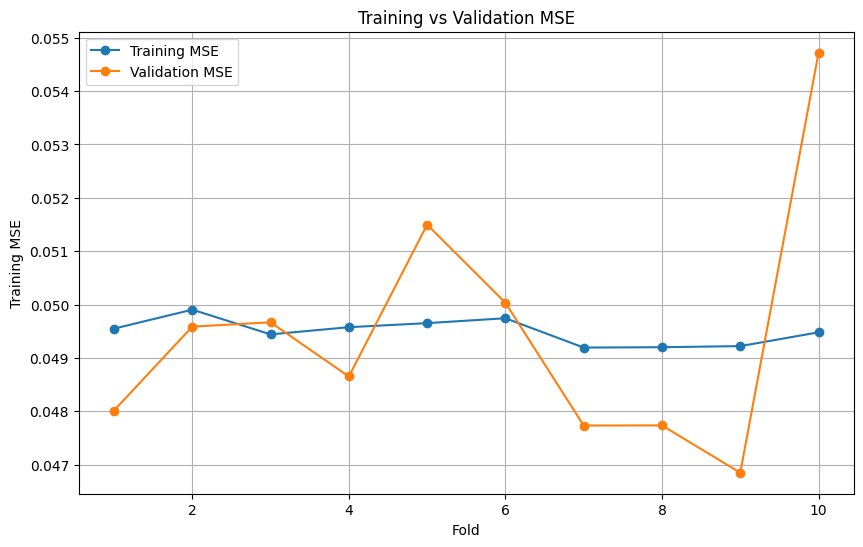

In [55]:
#Plot training and validation curves or lines

plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), training_scores, marker = 'o', label = 'Training MSE')
plt.plot(range(1, k+1), validation_scores, marker = 'o', label = 'Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Training MSE')
plt.title('Training vs Validation MSE')
plt.legend()
plt.grid(True)
plt.show()

### Obeservation

training error and validation error almost close.However validation error is little higher than training error, which is okay as long as it is close.

### Predict on X_test

In [ ]:
# Predict on X_test set
y_test_pred = model_lasso.predict(X_test)

In [58]:
print(y_test_pred)

[ 190.38595222  -31.25312008 -147.6540717  ...   71.05875252 -109.82718135
   10.17396442]


In [59]:
print(y_test)

[ 190.74137652  -31.36840094 -147.87393431 ...   71.23525822 -109.94190567
   10.15037753]


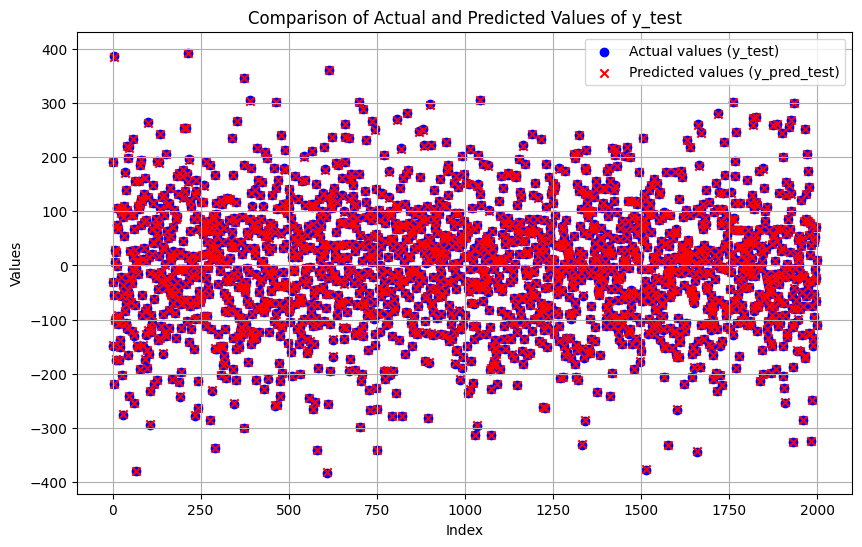

In [60]:
# Scatter plot where y_test vs y_test_pred


plt.figure(figsize = (10,6))
# Create scatter plot
plt.scatter(range(len(y_test)), y_test, color='blue', marker= 'o', label='Actual values (y_test)')
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red',marker= 'x', label='Predicted values (y_pred_test)')
plt.title("Comparison of Actual and Predicted Values of y_test")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


#### Observation

This is very good estimation as the values of y_test_pred and y_test are almost close. This often may not be true in case of real world dataset as it might have much noise.